# **Titanic: Machine Learning from Disaster** 
_____________________________________________________________
<sub>André Luiz - Data scientist and Bioinformatician</sub>





# Briefing Session
Titanic challenge from Kaggle is a Machine Learning starting problem. Now, i want to show how i solved this problem along this notebook.

In 1912, Titanic sank in a terrible tragedy killing 1512 people from 2224 passengers. Using **real data** disponibilized from [kegg](https://www.kaggle.com/competitions/titanic/data) we can do an **exploratory analysis** and construct a **preditive model** that answer questions like this: "*if a passenger in 2nd class can survive if he embarked with his child?*"

# Objectives and Checklist

* **Major Objective: With available data, measure the chance of survival of Titanic passengers.**

* **Minor objective:** Define which variables had the greatest influence on the probability of survival **AND** build a model that gives the prediction of survival for any passenger given as *input*.

* Checklist:

1. Problem Definition
2. Obtening Data
3. Data Exploration
4. Data Preparation
5. Model Building
6. Assessment


# 1. Problem Definition

Titanic was considered as the most prepared, modern and safe ship of the time. It was called **"unsinkable"**.

More details can be found in [kaggle page](https://www.kaggle.com/c/titanic).

Despite factors such as climate and the lack of lifeboats, as we will see below, passengers classified in classes such as **"children and women"** had a higher survival rate. *This doesn't seem to be just luck, but there may be some pattern to be extracted from the data.*

**Performance Metrics**

The *score* is calculated against the number of correct predictions your model made. That is, only the **accuracy** of the model is considered.

# 2. Obtening Data

Data provided by Kaggle was divided in two groups:

* **Training Dataset:** *Train.csv*
 * Used to construct the Machine Learning model. The key feature in this dataset is the **"Survived"** for each passenger. Has many other features as gender, age, etc.
* **Test Dataset:** *Test.csv*
 * Data don't used to construct model. In this dataset it's not informed if the passenger survived or not.


In this challenge is provided a template for final submission of data: *gender_submission.csv*. Also, this template is a kind of *simple rule test*, that says "all women survives and all man dies",this is a premisse on the titanic women and children were first evacuated. 

(If we submit this gender_submission.csv we got a **76%** score in kaggle)

In [5]:
# List files in work directory
!tree titanic_kaggle/

/bin/bash: tree: command not found


In [6]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# allow to view all columns
pd.options.display.max_columns = None

# render the graphics directly on the notebook
# %matplotlib inline

In [7]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_kaggle/test.csv')

In [8]:
# looking dimensions of DataFrame
print("Variables:\t{}\nEntries:\t{}".format(train.shape[1], train.shape[0]))

Variables:	12
Entries:	891


# 3. Data Exploration

Initially we observe the set of variables. We searched by variable type, missing values, outliers and distribution.

As a supervised learning, we can set the **"Survived"** variable as the *Target* variable.

## Data dictionary
* PassengerId: Passenger identification number
* Survived: Informs if the passenger survived the disaster
 * 0 = No
 * 1 = yes
* Pclass: Ticket class
 * 1 = 1st Class
 * 2 = 2nd Class
 * 3 = 3rd Class
* Name: Passenger's name
* Gender: Passenger's gender
* Age: Passenger age
* SibSp: Number of intimates and siblings on board
* Parch: Number of parents and children on board
* Ticket: Ticket number
* Fare: Ticket Price
* Cabin: Passenger cabin number
* Embarked: Port in which the passenger embarked
 * C = Cherbourg
 * Q = Queenstown
 * S = Southampton

**Q1. What are the types of each variable?**

* Numerical Variables
 * discreet
   * Pclass
   * SibSp
   * parch
 * Continuous
   * age
   * fare
 * Target
   * Survived
* Primary Key
 * PassengerId
* Categorical Variables
 * Name
 * Fri
 * ticket
 * cabin
 * Embarked

In [9]:
# Ientify each variable type
display(train.dtypes)

# 5 firsts variables of train set
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Now we can see if we have any missing or wrong data.**

In the code below we can see that the **Cabin** feature have 77% of values missing, the **Age** feature have 20% of missing values, and the **Embark** has 2% missing values.

In [10]:
# Look for missing values percentages
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**How is the statistical distribution of the data?**

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


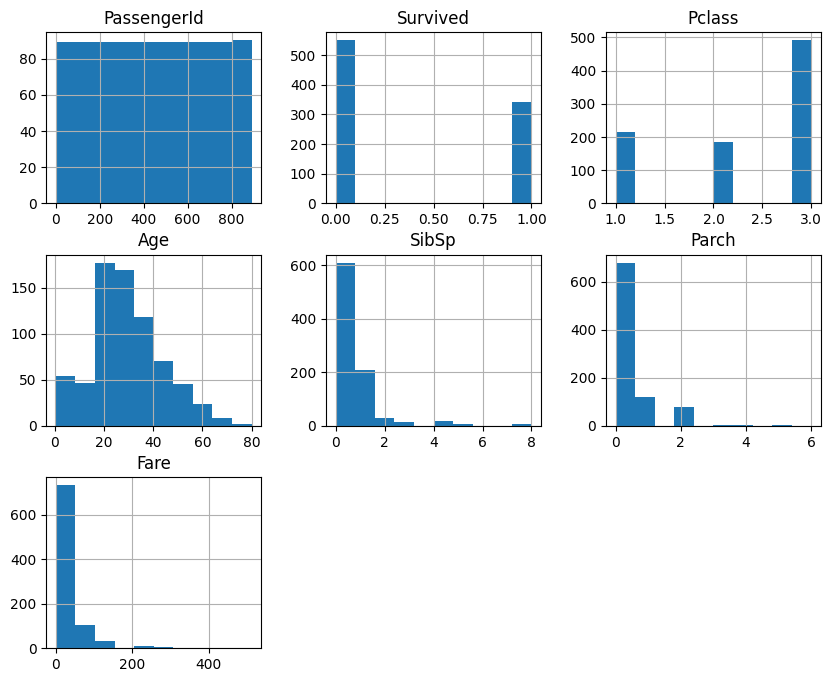

In [12]:
# Histogram of numerical variable for a more readble search
train.hist(figsize=(10,8));

**Which groups of people were most likely to survive?**

In [13]:
# Probability of survival by Sex
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


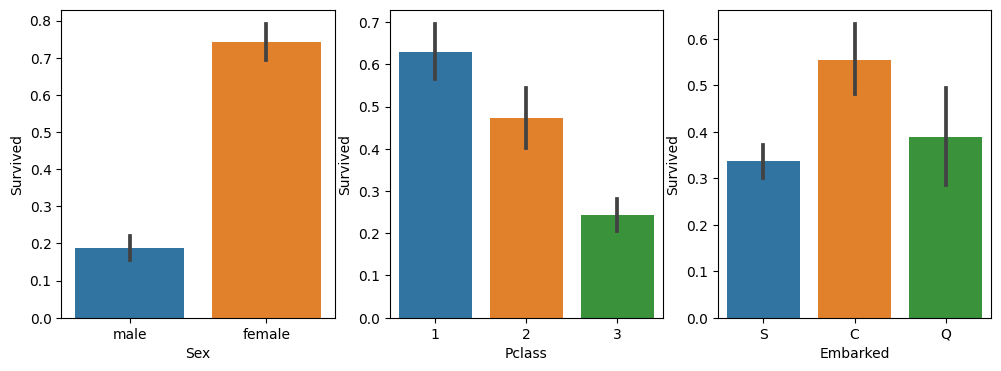

In [14]:
# Plot the graphs for Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

Look what a interesting thing. Here, in the first plot we can see that something more tnah **70% of woman survived**. 

When we submit that *gender_submission* file for aggle that assumes that all women survived (so, in that file all woman has 1 in survived feature), we get **76%** of score. 

This happens because kaggle's evaluation method is to perform the **sum of the correct values** in the prediction **divided by the total value**. That is, as **76%** of the women effectively survived, the rest are wrong, so our score results in **76%** when sending the file where all survive.

This is a validation model, but it is not unique, however it is used by kaggle in this instance.

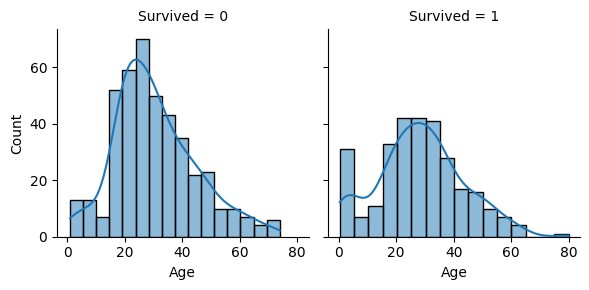

In [15]:
# see influence of age on probability of survival
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True)

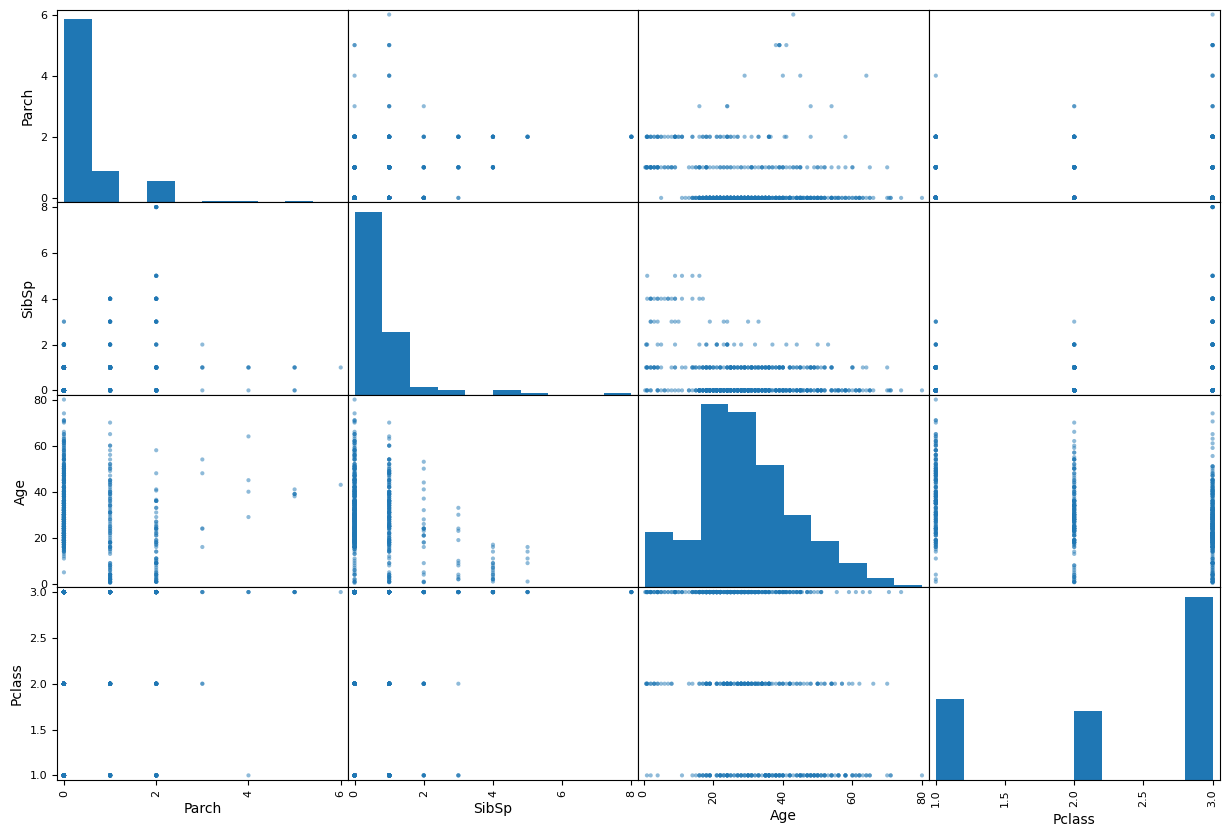

In [16]:
# plot scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

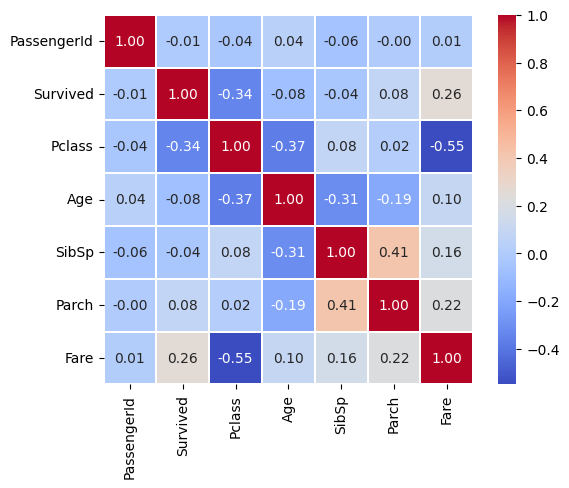

In [17]:
# heatmap for numerical variables
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

We can use the `df.describe()` to ook descritive estatistic in non-numerical columns using `include=['O']`.

In [18]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Looking this, we can see some interesting things:

* Values for `Name` are unique, one for each person;
 * As you can see 891 in `count`and `unique`

* There are *no missing values* for `Name` and `Sex`;

* There are only Male and Female genders, with the most frequent being `Male` (577/891 = 65%);

* The port where most passengers embarked is **S = Southampton**.

# 4. Data Preparation

Everything done so far has been a treatment importing and visualizing the data in DataFrames and exploring the data. Now, let's start preparing the data for the modeling step.

**Merging training and testing datasets**

In this case, I **merged the training and test** data into one. This is because during data manipulations it is necessary to make variations, create other variables, etc. and for this it is easier **to work on just one dataset**, and then separate it again.



In [19]:
# save dataset index for later recover
train_idx = train.shape[0]
test_idx = test.shape[0]

# save PassengerId for Kaggle submission
passengerId = test['PassengerId']

# extract 'Survived' column and delete it from the training dataset
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenate training and testing into a single DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


**Selecting Features**

Like a real dataset, some data is not informative and has no weight in the model.

After some observation, the variables `['PassengerId', 'Name', 'Ticket', 'Cabin']` were removed as they don't seem to have any relevance.

The remaining variables to be handled and prepared are: `['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']`.

In [20]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Missing Values**

After removing the columns of variables, let's see if there are *missing values*.

Usually, there are **two approaches** most used when we find missing values:
 * Fill these values arbitrarily (mean, median, most frequent value); or
 * Delete the entire line.

In many cases it seems to be interesting to maintain the integrity of the data and not remove rows because of only one missing data. Here I will use the first approach and keep the fields.

For the variables `Age` and `Fare`, I will put the median value, and for the `Embarked` variable, I will put the value with greater frequency.

In [21]:
# Looking for the miising value
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [22]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

**Preparing variables for the model**

The **mathematical model** requires us to work with numerical variables, that is, we have to **transform the input** data that are in category format into numbers.

As you can see, I convert the possible values of `Sex` to `{'male': 0, 'female': 1}`. Regarding the `Embarked` variable, I applied the concept of *dummy* variables.

The *dummy variables* here only assume values 0 and 1, creating a **new column** for each possible value of the categorical variable.

In [23]:
# convert 'Sex' in 0 and 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables for 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


**Retrieve train and test datasets**

After preparing the dataset for the model, we need to split `df_merged` into train and test, exactly as it was in the beginning. For this we use `iloc()`.



In [24]:
# retrieve training and test datasets
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# 5. Model construction and Evaluation

In my medium article(insert link when ready) i said that most of the time I spent in this project was exploring the data, treating and organizing them, and raising hypotheses.

This attention served to understand the problem, test hypotheses and discard unnecessary/redundant data.

In the next lines of code we can use the `sklearn` library to create and optimize two models: **Logistic Regression Model** and **Decision Tree Model**.

In [25]:
# importing Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [26]:
# creating a logistic regression model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# check the accuracy of the model
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Accuracy of logistic regression model: {}".format(acc_logReg))

Accuracy of logistic regression model: 80.13


In two lines, we built a Logistic Regression model with an accuracy of 80% on top of the training data set.

This result is a very good for a start model. I'll take the opportunity and make a prediction on the test dataset to submit to Kaggle and compare the performance.

In [27]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# create a csv file
submission.to_csv('./submission_lr.csv', index=False)

In kaggle, this fist tentative return a score of **76%.**

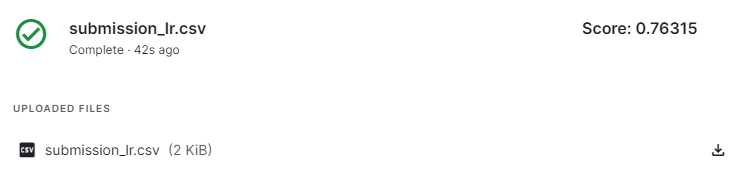

**Now I'm going to repeat the same to see how a model based on Decision Trees comes out, following the same steps.**

In [28]:
# creating a decision tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# check the accuracy of the model
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Accuracy of Decision Tree model: {}".format(acc_tree))

Accuracy of Decision Tree model: 82.72


A bit of more in this accuary fo ecision tree now with **83%**. Let's see if this can return a better score for kaggle now. 

In [29]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# create csv file
submission.to_csv('./submission_tree.csv', index=False)

As expected, we had an improvement in the score to almost **78%**.

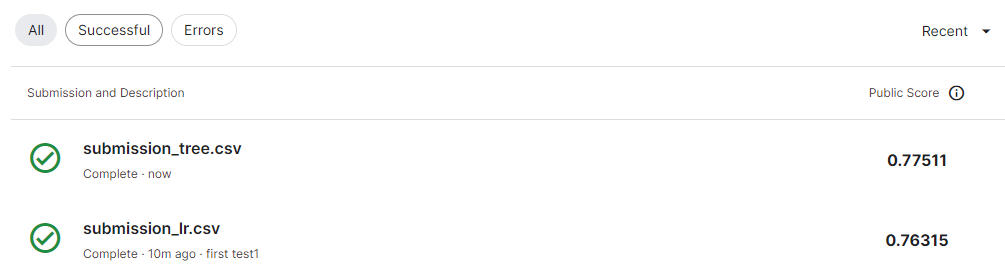

# Would I survive?

Okay, *almost all objectives have been successfully completed* and one more remains. **Can we put an input and the model returns saying if the input would survive?**

For that, let's adopt the "skin in the game" principle (or almost that), let's see if I would survive.

Let's imagine if my partner and I would survive. (okay, model, I created you, behave yourself)

I will put the data as me with 27 years old, she have 28, no children, and we embark with many other in Southpton. 



In [30]:
# declare variable values for me and my partner
andre_luiz = np.array([2, 0, 27, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))
my_partner = np.array([2, 1, 28, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# check if we would have survived
print("André Luiz:\t{}".format(tree_model.predict(andre_luiz)[0]))
print("My Partner:\t{}".format(tree_model.predict(my_partner)[0]))

André Luiz:	0
My Partner:	1


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
